# Lab 4 - A57 - Gong Zerui

In [74]:
import pandas as pd
import requests
import math
from ipwhois import IPWhois
from ipwhois.exceptions import IPDefinedError
import warnings
warnings.filterwarnings('ignore')

col_names = [
        "type", "sflow_agent_address", "inputPort", "outputPort", "src_MAC",
        "dst_MAC", "ethernet_type", "in_vlan", "out_vlan", "src_IP", "dst_IP",
        "IP_protocol", "ip_tos", "ip_ttl", "src_transport_port", "dst_transport_port",
        "tcp_flags", "packet_size", "IP_size", "sampling_rate"
    ]

df = pd.read_csv('actualdata.csv')
df = df.iloc[:,:-1]
df.columns = col_names
df

,type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,src_transport_port,dst_transport_port,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.160.32,64.233.188.128,6,0x00,56,23159.0,80,0x10,74,52,2048
1,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.53,140.115.32.83,6,0x00,50,50041.0,20739,0x10,1518,1500,2048
2,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.169.174.79,17,0x00,120,54241.0,26510,0x10,116,94,2048
3,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,193.62.192.8,6,0x00,56,53923.0,34262,0x10,70,52,2048
4,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.255.221.151,17,0x00,120,55069.0,26509,0x10,113,91,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69364,FLOW,aa.aa.aa.aa,258,199,204e71cf1b0f,ccef48570144,0x0800,537.0,601,207.241.228.157,210.48.222.9,6,0x00,56,443.0,57434,0x10,1522,1500,2048
69365,FLOW,aa.aa.aa.aa,131,193,00a742233e9e,0031466b23cf,0x0800,43.0,919,192.122.131.36,216.58.203.234,6,0x00,121,4920.0,443,0x10,1442,1420,2048
69366,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,193.62.192.8,6,0x00,56,34153.0,3123,0x10,82,64,2048
69367,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.196.9,74.125.56.6,17,0x00,58,56221.0,60786,0x10,1267,1245,2048


### Exercise 4A: Top Talkers and Listeners

In [19]:
talkers = df['src_IP'].value_counts().head(5)
listeners = df['dst_IP'].value_counts().head(5)

def get_organization(ip_address):
    try:
        ipwhois = IPWhois(ip_address)
        result = ipwhois.lookup_rdap()
        return result['asn_description']
    except:
        return 'Unknown'

In [20]:
print("Top 5 Talkers")
print("Rank\tIP address\t\t# of packets\tOrganization")

for index, (ip_address, packets) in enumerate(talkers.iteritems(), start=1):
    organization = get_organization(ip_address)
    print(f"{index}\t{ip_address}\t{packets}\t{organization}")

print("\nTop 5 Listeners")
print("Rank\tIP address\t\t# of packets\tOrganization")

for index, (ip_address, packets) in enumerate(listeners.iteritems(), start=1):
    organization = get_organization(ip_address)
    print(f"{index}\t{ip_address}\t{packets}\t{organization}")


Top 5 Talkers
Rank	IP address		# of packets	Organization
1	193.62.192.8	3041	JANET Jisc Services Limited, GB
2	155.69.160.32	2975	NTU-AS-AP Nanyang Technological University, SG
3	130.14.250.11	2604	NLM-GW, US
4	14.139.196.58	2452	NKN-EDGE-NW NKN EDGE Network, IN
5	140.112.8.139	2056	NTU-TW National Taiwan University, TW

Top 5 Listeners
Rank	IP address		# of packets	Organization
1	103.37.198.100	3841	A-STAR-AS-AP A-STAR, SG
2	137.132.228.15	3715	NUS-AS-AP NUS Information Technology, SG
3	202.21.159.244	2446	REPUBLICPOLYTECHNIC-AS Republic Polytechnic. Multihoming AS Singapore, SG
4	192.101.107.153	2368	ESNET-AS, US
5	103.21.126.2	2056	IITB-IN Powai, IN


### Exercise 4B: Transport Protocol

In [35]:
protocols = df["IP_protocol"].value_counts()
tcp_count = protocols[6]
udp_count = protocols[17]

tcp_percentage = tcp_count / len(df.index) * 100
udp_percentage = udp_count / len(df.index) * 100


In [36]:
print("Transport layer protocol\t# of packets")
print(f"TCP\t\t\t{tcp_packets} ({tcp_percentage:.2f}%)")
print(f"UDP\t\t\t{udp_packets} ({udp_percentage:.2f}%)")


Transport layer protocol	# of packets
TCP			56063 (80.82%)
UDP			9462 (13.64%)


### Exercise 4C: Application Protocol

In [38]:
top_ports = df['dst_transport_port'].value_counts().head(5)

print("Rank\tDestination IP port number\t# of packets\tService")
for i, (port, count) in enumerate(top_ports.items(), start=1):
    service = "--- replace manually later ---"  
    print(f"{i}\t{port}\t\t\t{count}\t\t{service}")

# 443: HTTPS
# 80: HTTP
# 52866: Dynamic and/or Private Ports by IANA, Xsan,by Apple Inc.
# 45512: Unkassigned
# 56152: Dynamic and/or Private Ports by IANA, Xsan,by Apple Inc.


Rank	Destination IP port number	# of packets	Service
1	443			13423		--- replace manually later ---
2	80			2647		--- replace manually later ---
3	52866			2068		--- replace manually later ---
4	45512			1356		--- replace manually later ---
5	56152			1341		--- replace manually later ---


In [41]:
# update code:
# Get the top 5 most frequently used destination ports
top_ports = df["dst_transport_port"].value_counts().head(5)

# Print the table header
print("Rank | Destination IP port number | # of packets | Service")
print("---- | -------------------------- | ----------- | -------")

# Iterate through the top 5 ports and print their information
for rank, (port, count) in enumerate(top_ports.items(), start=1):
    # Determine the service name based on the port number
    if port == 443:
        service = "HTTPS"
    elif port == 80:
        service = "HTTP"
    elif port == 52866:
        service = "Dynamic and/or Private Ports by IANA, Xsan,by Apple Inc."
    elif port == 45512:
        service = "Unkassigned"
    elif port == 56152:
        service = "Dynamic and/or Private Ports by IANA, Xsan,by Apple Inc."
    else:
        service = "Unknown"
        

    # Print the table row for this port
    print(f"{rank}    | {port:25} | {count:11} | {service}")


Rank | Destination IP port number | # of packets | Service
---- | -------------------------- | ----------- | -------
1    |                       443 |       13423 | HTTPS
2    |                        80 |        2647 | HTTP
3    |                     52866 |        2068 | Dynamic and/or Private Ports by IANA, Xsan,by Apple Inc.
4    |                     45512 |        1356 | Unkassigned
5    |                     56152 |        1341 | Dynamic and/or Private Ports by IANA, Xsan,by Apple Inc.


### Exercise 4D: Traffic

In [92]:
total_packet_size = df.loc[df.iloc[:, 0] == "FLOW", "IP_size"].sum() *2048/ (1024**2)
print(f"Total traffic: {total_packet_size: .3f} MB")


Total traffic:  126516.254 MB


### Exercise 4E: Additional Analysis

I'll first focus on the top 100 communicaton pairs and create a visualization of communications between different IP hosts

##### Visualization of Communications between Different IP Hosts

I'll be using the networkx library to create the visualization and matplotlib to display it.

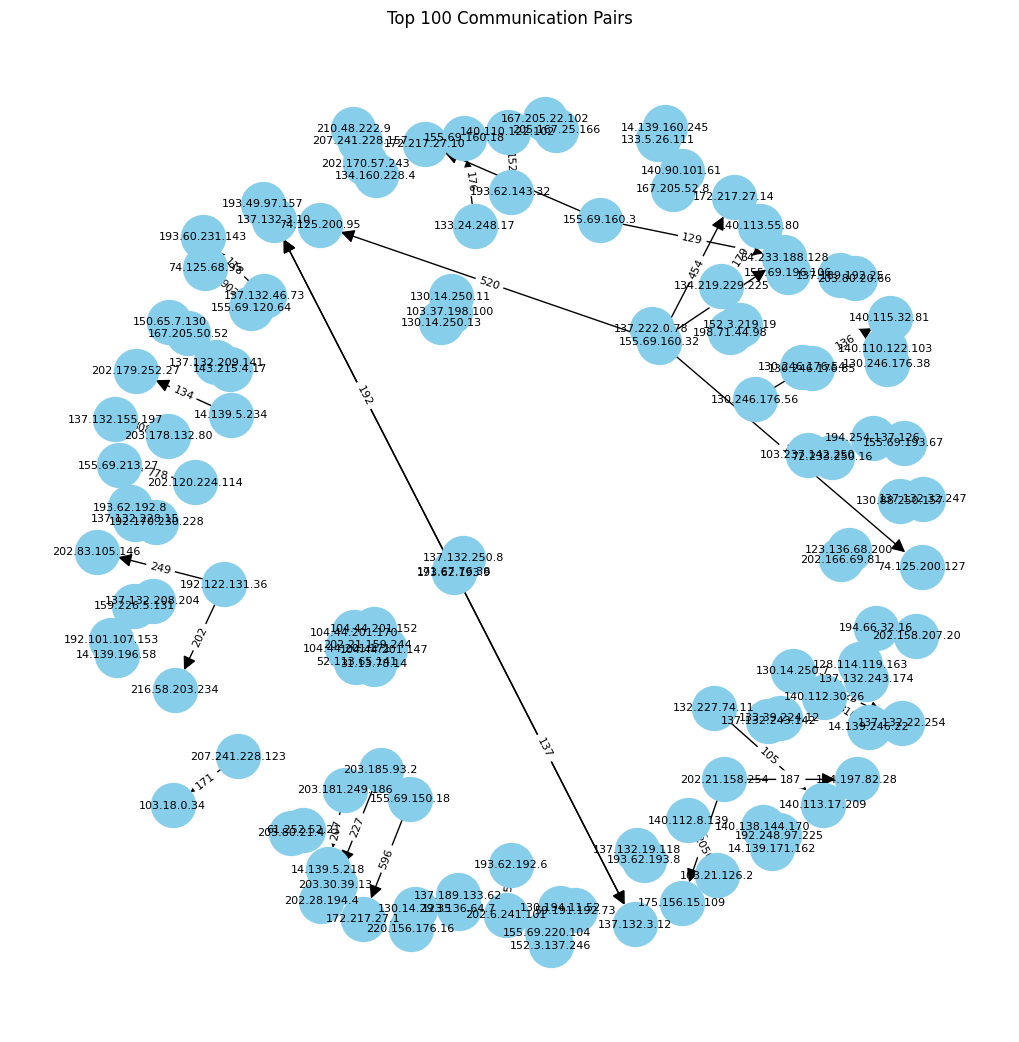

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

communication_pairs = df.groupby(["src_IP", "dst_IP"]).size().reset_index(name="count")
top_100_pairs = communication_pairs.sort_values("count", ascending=False).head(100)

# Create a new column in the top_100_pairs DataFrame
top_100_pairs['src_IP_dst_IP'] = list(zip(top_100_pairs['src_IP'], top_100_pairs['dst_IP']))
top_pairs = top_100_pairs["src_IP_dst_IP"].tolist()

# Filter the data to include only the top 100 communication pairs
filtered_df = df[df.apply(lambda row: (row["src_IP"], row["dst_IP"]) in top_pairs, axis=1)]

# Create a directed graph from the filtered dataframe
G_filtered = nx.from_pandas_edgelist(filtered_df, "src_IP", "dst_IP", create_using=nx.DiGraph())

# Draw the filtered graph with node labels
pos_filtered = nx.spring_layout(G_filtered, seed=42)
plt.figure(figsize=(10, 10))
nx.draw(G_filtered, pos_filtered, with_labels=True, node_size=1000, node_color="skyblue", arrowsize=20, font_size=8)

# Add edge labels with packet count
edge_labels_filtered = {(src, dst): filtered_df[(filtered_df["src_IP"] == src) & (filtered_df["dst_IP"] == dst)].shape[0] for src, dst in G_filtered.edges()}
nx.draw_networkx_edge_labels(G_filtered, pos_filtered, edge_labels=edge_labels_filtered, font_size=8)

plt.title("Top 100 Communication Pairs")
plt.show()


##### One more step, make an interactive visualization

I'll be using the Plotly library to create the interactive visualization, which allows user to hover over the nodes to see additional information.

In [84]:
# code for getting ip information using IPWhois
def get_ip_info(ip):
    try:
        ipwhois = IPWhois(ip)
        result = ipwhois.lookup_rdap(depth=1)
        return result
    except IPDefinedError:
        return None
    # except http error as well
    except Exception as e:
        print(e)
        return None


In [86]:
import plotly.graph_objs as go

# Initialize edge trace
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=1, color="gray"),
    hoverinfo="none",
    mode="lines",
)

# Add edge coordinates to the edge trace
for src, dst in G_filtered.edges():
    x0, y0 = pos_filtered[src]
    x1, y1 = pos_filtered[dst]
    edge_trace["x"] += (x0, x1, None)
    edge_trace["y"] += (y0, y1, None)

# Initialize node trace
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode="markers+text",
    hoverinfo="text",
    hovertext=[],
    marker=dict(
        symbol="circle",
        showscale=True,
        colorscale="Viridis",
        reversescale=True,
        color=[],
        size=[],
        colorbar=dict(thickness=15, title="Node Connections", xanchor="left", titleside="right"),
        line=dict(width=2, color="black"),
    ),
    textposition="bottom center",
)

# Add node coordinates, labels, and hover text to the node trace
for node in G_filtered.nodes():
    x, y = pos_filtered[node]
    num_connections = G_filtered.degree[node]
    node_trace["x"] += tuple([x])
    node_trace["y"] += tuple([y])
    node_trace["text"] += tuple("")
    ip_info = get_ip_info(node)
    if ip_info:
        country = ip_info["network"]["country"]
        org = ip_info["network"]["name"]
        hover_text = f"IP: {node}<br>Connections: {num_connections}<br>Country: {country}<br>Organization: {org}"
    else:
        hover_text = f"IP: {node}<br>Connections: {num_connections}"
    node_trace["hovertext"] += tuple([hover_text])
    node_trace["marker"]["color"] += tuple([num_connections])
    node_trace["marker"]["size"] += tuple([num_connections * 10])

# Create a Plotly figure with the edge and node traces
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="Communication Pairs",
        showlegend=False,
        hovermode="closest",
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor="white",  # Change the background color
    ),
)

# Show the figure
fig.show()


HTTP lookup failed for http://whois.nic.ad.jp/cgi-bin/whois_gw?lang=%2Fe&key=JP00037726&submit=query.
